# Investiogation of Synthetic Images

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import numpy as np
import re
from sklearn import linear_model
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
from sklearn.svm import SVC
import datetime
import os
import skimage.io
import shutil
import synthetic_func as sf

In [7]:
def plot_hist(label,room,ttle='Room Histograms',cir_bins=range(1,11)):
    label = label+np.random.rand(len(label))*.1-.05
    label=np.round(label).astype(np.int)
    plt.figure()
    plt.subplot(1,3,1)
    plt.hist(label[room==1],cir_bins)
    plt.subplot(1,3,2)
    plt.hist(label[room==2],cir_bins)
    plt.title(ttle)
    plt.subplot(1,3,3)
    plt.hist(label[room==3],cir_bins)

In [3]:
rootdir="Z:\\Grants\\Image Project\\Data_Sets\\Synthetic\\Rated\\BriansHouse-to-be-rated_2017-06-23"
logdir="G:\\HoardingImages\\_completed\\BriansHouse_2017-06-30"
roomdirs=["\\BR","\\Kitchen","\\LR"]

for rm in roomdirs:
    fnames=os.listdir("".join((rootdir,rm,"\\9")))
    for fname in fnames:
        if fname.startswith("cam4"):
            
            imNumber=int(fname.split('.')[0][7:])
            logtarget="".join((logdir,rm,"\\fr",str(imNumber),"_log.txt"))
            logdest="".join((rootdir,"\\logs\\fr",str(imNumber),"_log.txt"))
            shutil.copy(logtarget,logdest)
            ftarget="".join((rootdir,rm,"\\9\\",fname))
            fdest="".join((rootdir,rm,"\\9\\",fname[5:]))
            os.rename(ftarget,fdest)

[65.339999999999989, 72.071999999999989, 176.43600000000001]
Number of images is 208.0
Number of frames is 150
Mean CIR values for scenes
[ 2.5  4.   5.   5.5  7.   8.   8.5  8.5  8.5  2.   4.   4.5  5.5  5.5  6.
  7.   7.   8.   8.   8.   8.5  8.5  8.5  8.5  2.   4.   5.   5.5  6.   6.5
  7.5  7.5  7.5  7.5  8.   8.   8.   8.   8.5  2.5  5.   6.   7.   7.   7.5
  8.   8.   8.   8.5  8.5  8.5  8.5  8.5  1.   4.   5.   5.5  6.5  7.   8.
  8.   8.   8.   8.   8.   8.5  3.   4.5  5.5  6.5  7.5  7.5  7.5  8.   8.
  8.   8.   8.   8.5  8.5  5.   6.   6.5  7.   8.   8.   8.   8.5  8.5  8.5
  9.   9.   9.   2.   5.5  6.   6.5  7.   8.   8.   8.   8.5  9.   9.   9.
  9.   2.   4.5  5.5  6.5  7.   8.   8.   8.   8.   9.   9.   9.   9.   9.
  4.   4.5  5.   6.5  7.   7.   8.   8.   8.   8.   8.   8.   8.   8.   5.5
  6.5  7.   8.   8.   8.5  8.5  8.5  8.5  2.   4.   5.5  6.5  6.5  7.   8. ]
Rooms of scenes
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2. 

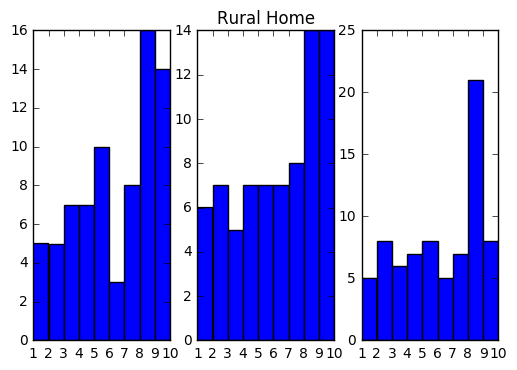

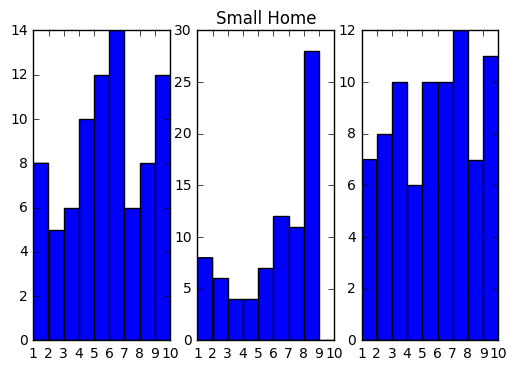

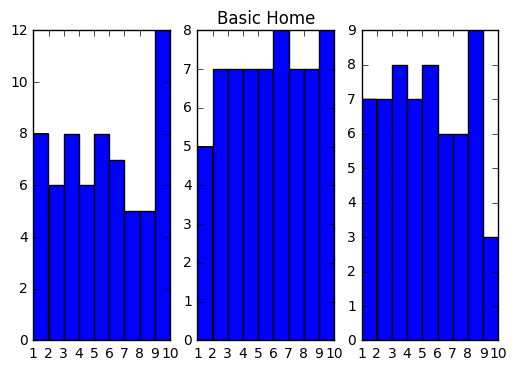

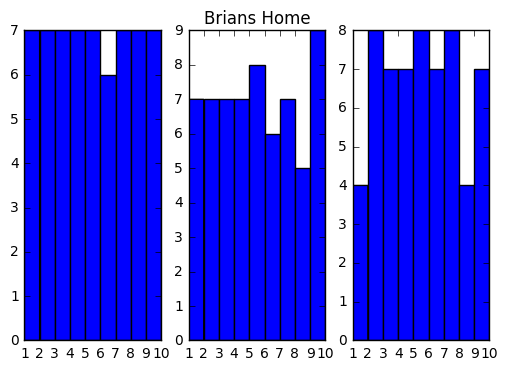

In [4]:
logpath='Z:\\Grants\\Image Project\\Data_Sets\\Synthetic\\Rated\\RuralHome_08-Jun-2017\\logs\\fr2_log.txt'
[coor,scle,sze,rot,corners1] = sf.text2feat(logpath)

logpath='Z:\\Grants\\Image Project\\Data_Sets\\Synthetic\\Rated\\RuralHome_08-Jun-2017\\logs\\fr53_log.txt'
[coor,scle,sze,rot,corners2] = sf.text2feat(logpath)

logpath='Z:\\Grants\\Image Project\\Data_Sets\\Synthetic\\Rated\\RuralHome_08-Jun-2017\\logs\\fr100_log.txt'
[coor,scle,sze,rot,corners3] = sf.text2feat(logpath)

corners_rural=[corners1,corners2,corners3]


logpath='Z:\\Grants\\Image Project\\Data_Sets\\Synthetic\\Rated\\BasicHouse_2017-06-26-to-be-rated\\logs\\fr15_log.txt'
[coor,scle,sze,rot,corners1] = sf.text2feat(logpath)

logpath='Z:\\Grants\\Image Project\\Data_Sets\\Synthetic\\Rated\\BasicHouse_2017-06-26-to-be-rated\\logs\\fr102_log.txt'
[coor,scle,sze,rot,corners2] = sf.text2feat(logpath)

logpath='Z:\\Grants\\Image Project\\Data_Sets\\Synthetic\\Rated\\BasicHouse_2017-06-26-to-be-rated\\logs\\fr179_log.txt'
[coor,scle,sze,rot,corners3] = sf.text2feat(logpath)

corners_basic=[corners1,corners2,corners3]


logpath='Z:\\Grants\\Image Project\\Data_Sets\\Synthetic\\Rated\\SmallApt_unity_08-Jun-2017\\logs\\fr9_log.txt'
[coor,scle,sze,rot,corners1] = sf.text2feat(logpath)

logpath='Z:\\Grants\\Image Project\\Data_Sets\\Synthetic\\Rated\\SmallApt_unity_08-Jun-2017\\logs\\fr56_log.txt'
[coor,scle,sze,rot,corners2] = sf.text2feat(logpath)

logpath='Z:\\Grants\\Image Project\\Data_Sets\\Synthetic\\Rated\\SmallApt_unity_08-Jun-2017\\logs\\fr100_log.txt'
[coor,scle,sze,rot,corners3] = sf.text2feat(logpath)

corners_small=[corners1,corners2,corners3]

logpath='Z:\\Grants\\Image Project\\Data_Sets\\Synthetic\\Rated\\BriansHouse-to-be-rated_2017-06-23\\logs\\fr39_log.txt'
[coor,scle,sze,rot,corners1] = sf.text2feat(logpath)

logpath='Z:\\Grants\\Image Project\\Data_Sets\\Synthetic\\Rated\\BriansHouse-to-be-rated_2017-06-23\\logs\\fr110_log.txt'
[coor,scle,sze,rot,corners2] = sf.text2feat(logpath)

logpath='Z:\\Grants\\Image Project\\Data_Sets\\Synthetic\\Rated\\BriansHouse-to-be-rated_2017-06-23\\logs\\fr215_log.txt'
[coor,scle,sze,rot,corners3] = sf.text2feat(logpath)

corners_brian=[corners1,corners2,corners3]



rootdir = 'Z:\\Grants\\Image Project\\Data_Sets\\Synthetic\\Rated'
subdirs=['\\RuralHome_08-Jun-2017']
roomdirs=['\\BR','\\Kitchen','\\LR']
[fvec_rural_tr1,label_rural_tr1,room_rural_tr1]=sf.featExtract2(rootdir,subdirs,roomdirs,nrmalize=True,m=corners_rural)

subdirs=['\\RuralHome_2017-06-16']
roomdirs=['\\BR','\\Kitchen','\\LR']
[fvec_rural_tr2,label_rural_tr2,room_rural_tr2]=sf.featExtract2(rootdir,subdirs,roomdirs,nrmalize=True,m=corners_rural)

subdirs=['\\SmallApt_unity_2017-06-16']
roomdirs=['\\BR','\\Kitchen','\\LR']
[fvec_small_tr1,label_small_tr1,room_small_tr1]=sf.featExtract2(rootdir,subdirs,roomdirs,nrmalize=True,m=corners_small)

subdirs=['\\SmallApt_unity_08-Jun-2017']
roomdirs=['\\BR','\\Kitchen','\\LR']
[fvec_small_tr2,label_small_tr2,room_small_tr2]=sf.featExtract2(rootdir,subdirs,roomdirs,nrmalize=True,m=corners_small)

subdirs=['\\BasicHouse_2017-06-26-to-be-rated']
roomdirs=['\\BR','\\Kitchen','\\LR']
[fvec_basic_tr,label_basic_tr,room_basic_tr]=sf.featExtract2(rootdir,subdirs,roomdirs,nrmalize=True,m=corners_basic)

subdirs=['\\BriansHouse-to-be-rated_2017-06-23']
roomdirs=['\\BR','\\Kitchen','\\LR']
[fvec_brian_tr,label_brian_tr,room_brian_tr]=sf.featExtract2(rootdir,subdirs,roomdirs,nrmalize=True,m=corners_brian)

fvec_rural_tr=np.concatenate((fvec_rural_tr1,fvec_rural_tr2),axis=0)
room_rural_tr=np.concatenate((room_rural_tr1,room_rural_tr2),axis=0)
label_rural_tr=np.concatenate((label_rural_tr1,label_rural_tr2),axis=0)


fvec_small_tr=np.concatenate((fvec_small_tr1,fvec_small_tr2),axis=0)
room_small_tr=np.concatenate((room_small_tr1,room_small_tr2),axis=0)
label_small_tr=np.concatenate((label_small_tr1,label_small_tr2),axis=0)

fvec_rural_tr=sf.feat_transform(fvec_rural_tr)
fvec_small_tr=sf.feat_transform(fvec_small_tr)
fvec_basic_tr=sf.feat_transform(fvec_basic_tr)
fvec_brian_tr=sf.feat_transform(fvec_brian_tr)

sf.plot_hist(label_rural_tr,room_rural_tr,ttle='Rural Home')
sf.plot_hist(label_small_tr,room_small_tr,ttle='Small Home')
sf.plot_hist(label_basic_tr,room_basic_tr,ttle='Basic Home')
sf.plot_hist(label_brian_tr,room_brian_tr,ttle='Brians Home')

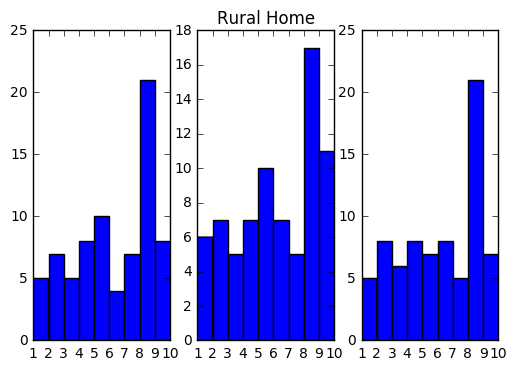

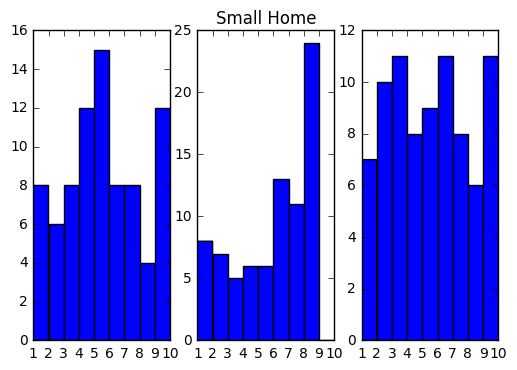

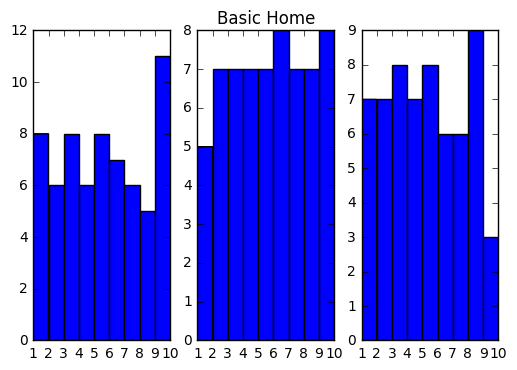

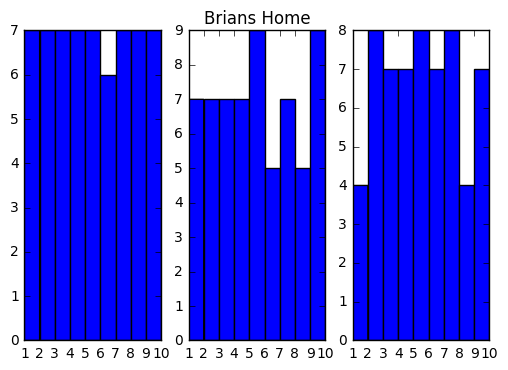

In [8]:
plot_hist(label_rural_tr,room_rural_tr,ttle='Rural Home')
plot_hist(label_small_tr,room_small_tr,ttle='Small Home')
plot_hist(label_basic_tr,room_basic_tr,ttle='Basic Home')
plot_hist(label_brian_tr,room_brian_tr,ttle='Brians Home')

In [ ]:
fvec_tr=np.concatenate((fvec_rural_tr,fvec_small_tr,fvec_basic_tr,fvec_brian_tr),axis=0)
room_tr=np.concatenate((room_rural_tr,room_small_tr,room_basic_tr,room_brian_tr),axis=0)
label_tr=np.concatenate((label_rural_tr,label_small_tr,label_basic_tr,label_brian_tr),axis=0)

plt.hist(label_tr*2,range(2,22,2))
plot_hist(label_tr,room_tr,ttle='Overall')

regr_ovr=best_param(fvec_tr,label_tr*2)


In [ ]:
print(regr_ovr)
[y_cv,y_pred]=sf.cross_val(regr_ovr,fvec_tr,label_tr*2,cv=2)
cir_1=np.mean((np.abs(np.ceil(y_pred/2)-np.ceil(y_cv/2))<=1).astype(np.float))
print(cir_1)
plt.hist(y_pred,range(2,22,2))
plt.title('Predictions')
plt.figure()
plt.hist(y_cv,range(2,22,2))
plt.title('Ground Truth')
plt.figure()

In [4]:
regr_rural= sf.best_param(fvec_rural_tr,label_rural_tr*2)
regr_small= sf.best_param(fvec_small_tr,label_small_tr*2)
regr_basic= sf.best_param(fvec_basic_tr,label_basic_tr*2)
regr_brian= sf.best_param(fvec_brian_tr,label_brian_tr*2)

MAX CIR-0=0.604444444444MAX CIR-1=0.977777777778 achieved at C=64.0, gamma=1.0
MAX CIR-0=0.586776859504MAX CIR-1=0.995867768595 achieved at C=64.0, gamma=0.5
MAX CIR-0=0.645502645503MAX CIR-1=0.957671957672 achieved at C=128.0, gamma=1.0
MAX CIR-0=0.627027027027MAX CIR-1=0.951351351351 achieved at C=128.0, gamma=0.25


(array([16, 22, 16, 21,  4, 31, 15, 13, 51, 36], dtype=int64), array([ 1. ,  1.8,  2.6,  3.4,  4.2,  5. ,  5.8,  6.6,  7.4,  8.2,  9. ]))


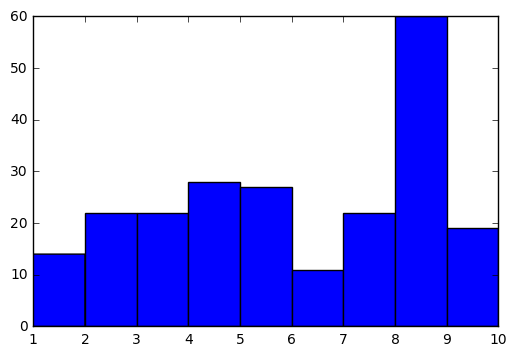

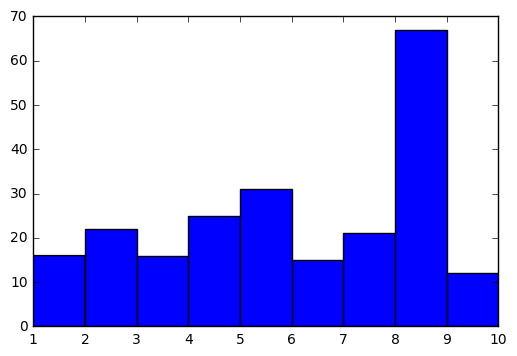

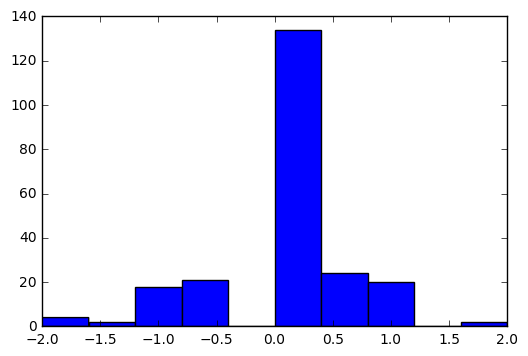

In [6]:

[y_cv,y_pred]=sf.cross_val(regr_rural,fvec_rural_tr,label_rural_tr,cv=3)
plt.hist(y_pred,range(1,11))
plt.figure()
plt.hist(y_cv,range(1,11))
plt.figure()
plt.hist(y_pred-y_cv)
print(np.histogram(y_cv))

In [ ]:
logpath='G:\\HoardingImages\\_new_images\\_completed\\OldHouse_2017-07-11\\BR\\fr30_log.txt'
[coor,scle,sze,rot,corners1] = sf.text2feat(logpath)

logpath='G:\\HoardingImages\\_new_images\\_completed\\OldHouse_2017-07-11\\Kitchen\\fr4480_log.txt'
[coor,scle,sze,rot,corners2] = sf.text2feat(logpath)

logpath='G:\\HoardingImages\\_new_images\\_completed\\OldHouse_2017-07-11\\LR\\fr8900_log.txt'
[coor,scle,sze,rot,corners3] = sf.text2feat(logpath)

corners_old=[corners1,corners2,corners3]

rootdir="G:\\HoardingImages"
subdirs=["\\_new_images\\_completed\\OldHouse_2017-07-11"]
roomdirs=["\\BR","\\Kitchen","\\LR"]
[fvec_old_test,room_old_test,frame_old_test]=sf.featExtract3(rootdir,subdirs,roomdirs,nrmalize=True,m=corners_old)
fvec_old_test=sf.feat_transform(fvec_old_test)

In [ ]:
print(fvec_old_test.shape)
label_old_test=regr_ovr.predict(fvec_old_test)
plot_hist(label_old_test,room_old_test,ttle='Old Home')

In [ ]:
[idx_old, label_old]=sf.selectImages(regr_ovr,fvec_tr,label_tr*2,fvec_old_test,room_old_test,15,min_cir=1,max_cir=9)
print('printing labels')
print(np.histogram(label_old,bins=range(2,20,2)))
print(idx_old)

In [ ]:
rootdir='G:\\HoardingImages\\_new_images\\_completed\\OldHouse_2017-07-11'
subdirs=['\\BR','\\Kitchen','\\LR']
fr_num=frame_old_test[idx_old]
fr_num[idx_old==-1]=-1
print(fr_num)
sf.saveImages(rootdir,subdirs,fr_num)

In [18]:
def save_images_with_label(rootdir,subdirs,frame_test,room_test,labels,im_num=6):
    frames=[frame_test[room_test==1],frame_test[room_test==2],frame_test[room_test==3]]
    labels=labels.astype(np.int)
    labels=[labels[room_test==1],labels[room_test==2],labels[room_test==3]]
    destdir=rootdir+'-rated'
    if not os.path.exists(destdir+'\\logs'):
            os.makedirs(destdir+'\\logs')

    for k in range(len(subdirs)):
        if not os.path.exists(destdir+subdirs[k]):
            for cir in range(1,10):
                os.makedirs(destdir+subdirs[k]+'\\'+str(cir))
        for fr in range(len(frames[k])):
            fr_num=frames[k][fr]
            fr_label=labels[k][fr]
            if(fr!=0):
                for l in range(im_num):
                    targetdir="".join((rootdir,subdirs[k],'\\cam',str(l+1),'_fr',str(fr_num),'.png'))
                    destdirr="".join((destdir,subdirs[k],'\\',str(fr_label),'\\cam',str(l+1),'_fr',str(fr_num),'.png'))
                    shutil.copy2(targetdir,destdirr)
                logTarget="".join((rootdir,subdirs[k],'\\fr',str(fr_num),'_log.txt'))
                logDest="".join((destdir,'\\logs\\fr',str(fr_num),'_log.txt'))
                shutil.copy2(logTarget,logDest)


In [7]:
rootdir="G:\\HoardingImages"
subdirs=["\\_completed\\RuralHome_2017-06-30"]
roomdirs=["\\BR","\\Kitchen","\\LR"]
[fvec_rural_test,room_rural_test,frame_rural_test]=sf.featExtract3(rootdir,subdirs,roomdirs,nrmalize=True,m=corners_rural)
fvec_rural_test=sf.feat_transform(fvec_rural_test)

Number of frames is 21920
Frame numbers
[    0     1     2 ..., 21917 21918 21919]
Rooms of scenes
[ 1.  1.  1. ...,  3.  3.  3.]
Shape of the feature vector
(21920, 15000, 4)
Normalization started with m=-5.70 and M=-0.20
Normalization started with m=1.00 and M=4.60
Normalization started with m=1.30 and M=4.60
Normalization started with m=0.20 and M=5.80
Normalization started with m=0.70 and M=4.60
Normalization started with m=1.30 and M=4.60
Normalization started with m=-2.10 and M=5.70
Normalization started with m=0.70 and M=4.60
Normalization started with m=-4.70 and M=1.10


C:\Users\mtezcan\Dropbox\_CURRENT FILES\Clutter_Detection\synthetic_func.py:425: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  decisions[:,clf.classes_[k]]=decisions_[:,k]


[ 1.  2.  3.  4.  5.  6.  7.  8.  9.]


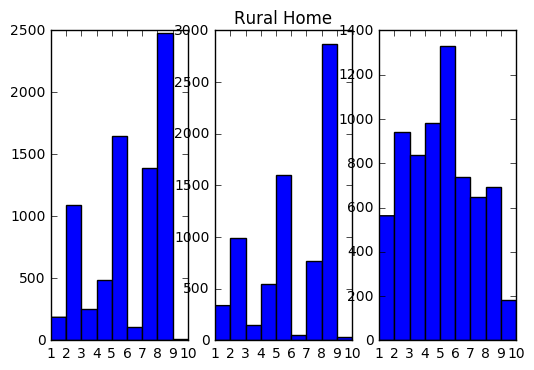

In [16]:
regr_rural.fit(fvec_rural_tr,label_rural_tr*2)
label_rural_test=sf.predict_cir(regr_rural,fvec_rural_test)
print(np.unique(label_rural_test))
sf.plot_hist(label_rural_test,room_rural_test,ttle='Rural Home')

In [20]:
rootdir='G:\\HoardingImages\\_completed\\RuralHome_2017-06-30'
subdirs=['\\BR','\\Kitchen','\\LR']
save_images_with_label(rootdir,subdirs,frame_rural_test,room_rural_test,label_rural_test,im_num=6)


In [21]:
rootdir="G:\\HoardingImages"
subdirs=["\\_completed\\BasicHouse_2017-07-01"]
roomdirs=["\\BR","\\Kitchen","\\LR"]
[fvec_basic_test,room_basic_test,frame_basic_test]=sf.featExtract3(rootdir,subdirs,roomdirs,nrmalize=True,m=corners_basic)
fvec_basic_test=sf.feat_transform(fvec_basic_test)
print(fvec_basic_test.shape)
#label_rural_test=regr_rural.predict(fvec_rural_test)
#plot_hist(label_rural_test,room_rural_test,ttle='Rural Home')

Number of frames is 29295
Frame numbers
[    0     1     2 ..., 29292 29293 29294]
Rooms of scenes
[ 1.  1.  1. ...,  1.  1.  1.]
Shape of the feature vector
(29295, 15000, 4)
Normalization started with m=-2.60 and M=6.40
Normalization started with m=3.60 and M=6.70
Normalization started with m=-3.00 and M=4.20
Normalization started with m=-8.60 and M=-3.10
Normalization started with m=0.10 and M=3.20
Normalization started with m=-12.80 and M=-4.60
Normalization started with m=-6.30 and M=-0.60
Normalization started with m=3.60 and M=6.80
Normalization started with m=-13.00 and M=-6.60
(29295, 14)


C:\Users\mtezcan\Dropbox\_CURRENT FILES\Clutter_Detection\synthetic_func.py:425: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  decisions[:,clf.classes_[k]]=decisions_[:,k]


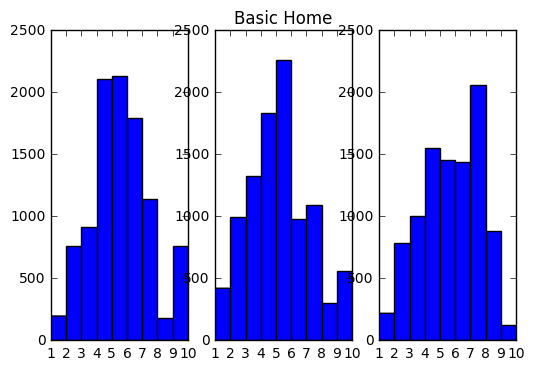

In [23]:
regr_basic.fit(fvec_basic_tr,label_basic_tr*2)
label_basic_test=sf.predict_cir(regr_basic,fvec_basic_test)
sf.plot_hist(label_basic_test,room_basic_test,ttle='Basic Home')

In [24]:
rootdir='G:\\HoardingImages\\_completed\\BasicHouse_2017-07-01'
subdirs=['\\BR','\\Kitchen','\\LR']
save_images_with_label(rootdir,subdirs,frame_basic_test,room_basic_test,label_basic_test,im_num=6)

In [25]:
rootdir="G:\\HoardingImages"
subdirs=["\\_completed\\BriansHouse_2017-06-30"]
roomdirs=["\\BR","\\Kitchen","\\LR"]
[fvec_brian_test,room_brian_test,frame_brian_test]=sf.featExtract3(rootdir,subdirs,roomdirs,nrmalize=True,m=corners_brian)
fvec_brian_test=sf.feat_transform(fvec_brian_test)
print(fvec_brian_test.shape)


Number of frames is 25121
Frame numbers
[    0     1     2 ..., 25118 25119 25120]
Rooms of scenes
[ 1.  1.  1. ...,  3.  3.  3.]
Shape of the feature vector
(25121, 15000, 4)
Normalization started with m=-6.30 and M=-1.00
Normalization started with m=0.50 and M=3.50
Normalization started with m=-0.10 and M=4.30
Normalization started with m=-0.90 and M=5.70
Normalization started with m=0.40 and M=3.40
Normalization started with m=0.00 and M=9.00
Normalization started with m=2.90 and M=7.60
Normalization started with m=0.60 and M=3.40
Normalization started with m=-7.40 and M=-0.20
(25121, 14)


C:\Users\mtezcan\Dropbox\_CURRENT FILES\Clutter_Detection\synthetic_func.py:425: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  decisions[:,clf.classes_[k]]=decisions_[:,k]


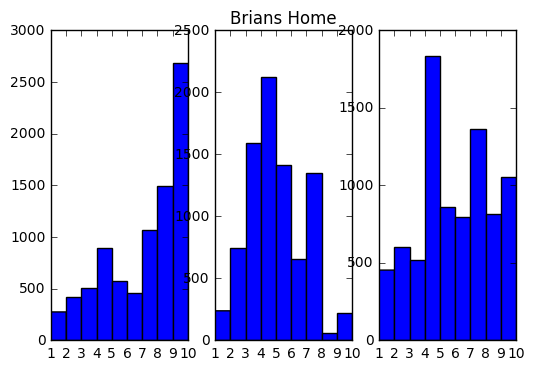

In [26]:
regr_brian.fit(fvec_brian_tr,label_brian_tr*2)
label_brian_test=sf.predict_cir(regr_brian,fvec_brian_test)
sf.plot_hist(label_brian_test,room_brian_test,ttle='Brians Home')

In [27]:
rootdir='G:\\HoardingImages\\_completed\\BriansHouse_2017-06-30'
subdirs=['\\BR','\\Kitchen','\\LR']
save_images_with_label(rootdir,subdirs,frame_brian_test,room_brian_test,label_brian_test,im_num=6)

Number of frames is 25446
Frame numbers
[    0     1     2 ..., 25443 25444 25445]
Rooms of scenes
[ 1.  1.  1. ...,  1.  1.  1.]
Shape of the feature vector
(25446, 15000, 4)
Normalization started with m=11.20 and M=17.60
Normalization started with m=18.60 and M=22.00
Normalization started with m=27.20 and M=32.90
Normalization started with m=11.10 and M=17.60
Normalization started with m=18.60 and M=22.00
Normalization started with m=23.80 and M=27.00
Normalization started with m=-3.20 and M=4.50
Normalization started with m=18.50 and M=22.00
Normalization started with m=23.50 and M=30.70
(25446, 14)


C:\Users\mtezcan\Dropbox\_CURRENT FILES\Clutter_Detection\synthetic_func.py:425: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  decisions[:,clf.classes_[k]]=decisions_[:,k]


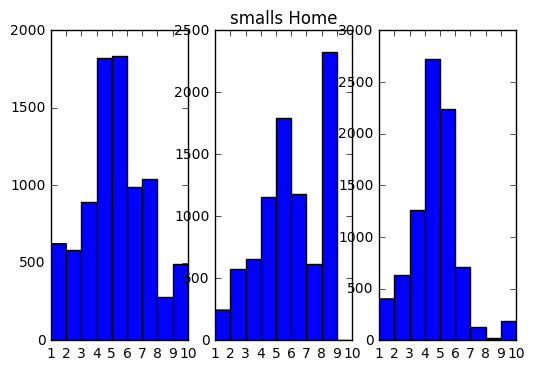

In [28]:
rootdir="G:\\HoardingImages"
subdirs=["\\_completed\\SmallApt_2017-06-29"]
roomdirs=["\\BR","\\Kitchen","\\LR"]
[fvec_small_test,room_small_test,frame_small_test]=sf.featExtract3(rootdir,subdirs,roomdirs,nrmalize=True,m=corners_small)
fvec_small_test=sf.feat_transform(fvec_small_test)
print(fvec_small_test.shape)
regr_small.fit(fvec_small_tr,label_small_tr*2)
label_small_test=sf.predict_cir(regr_small,fvec_small_test)
sf.plot_hist(label_small_test,room_small_test,ttle='smalls Home')
rootdir='G:\\HoardingImages\\_completed\\SmallApt_2017-06-29'
subdirs=['\\BR','\\Kitchen','\\LR']
save_images_with_label(rootdir,subdirs,frame_small_test,room_small_test,label_small_test,im_num=6)